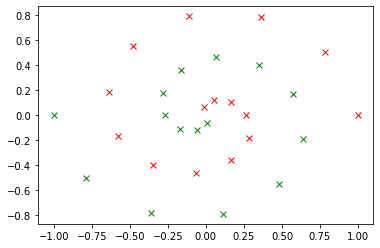

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt

def spiral_xy(i, spiral_num, n):
    rm=13
    dn=n//2
    φ = i/5.5 * math.pi # 16
    r = (rm/2) * ((dn - i)/(dn)) # 104 
    x = (r * math.cos(φ) * spiral_num)/rm + 0.5
    y = (r * math.sin(φ) * spiral_num)/rm + 0.5
    return (x, y)

def spiral(spiral_num, n):
    return [spiral_xy(i, spiral_num, n) for i in range(n//2)]


# generate the spiral data
n=30
d=3
a = spiral(1, n)
b = spiral(-1, n)
X=2*np.concatenate((a,b),axis=0)-1
X=X#/np.max(np.abs(X))

X=np.append(X,np.ones((n,1)),axis=1)
y=np.concatenate((np.ones(n//2),-np.ones(n//2)))

# visualize the spiral data
pos=np.where(y==1)
neg=np.where(y==-1)

plt.plot(X[pos,0],X[pos,1],'rx');
plt.plot(X[neg,0],X[neg,1],'gx');


# Sample diagonal matrices
P=500
Umat=np.random.randn(d,P)
dmat=(X@Umat>=0)


In [7]:
###### to be completed ######
import cvxpy as cp
def get_D(i):
    # hi = np.random.randn(d, 1)
    # diagonal = (X@hi >= 0).astype(int)
    # D = np.diag(diagonal.flatten())
    return np.diag(dmat[:,i].flatten())

beta = 0.01
Ds = [get_D(i) for i in range(P)]
u_mat = cp.Variable((d, P))
up_mat = cp.Variable((d, P))


def solve_problem(beta):
    cost = (
        cp.square(cp.norm(
            cp.sum([Ds[j]@X@(u_mat[:, j]-up_mat[:,j]) for j in range(P)]).flatten()-y.flatten()
        ))+
        beta*cp.sum([cp.norm(u_mat[:,j].flatten()) + cp.norm(up_mat[:, j].flatten()) for j in range(P)])
    )

    constraints = []
    I = np.eye(n)
    for i in range(P):
        constraints.append(
        (2*Ds[i]-I)@X@u_mat[:, i].flatten()>=0
        )
        constraints.append(
        (2*Ds[i]-I)@X@up_mat[:, i].flatten()>=0
        )

    prob = cp.Problem(cp.Minimize(cost), constraints)
    prob.solve()
    print(prob.value)
    print(prob.status)
    return u_mat.value, up_mat.value

# w1 = np.zeros((d, P))
# w2 = np.zeros((1, P))
# w1p = np.zeros((d, P))
# w2p = np.zeros((1, P))


# for i in range(P):
#     w1[:, i] = u_mat.value[:, i]/np.sqrt(np.linalg.norm(u_mat.value[:, i]))    
#     w2[:, i] = np.sqrt(np.linalg.norm(u_mat.value[:, i]))
#     w1p[:, i] = up_mat.value[:, i]/np.sqrt(np.linalg.norm(up_mat.value[:, i]))    
#     w2p[:, i] = np.sqrt(np.linalg.norm(up_mat.value[:, i]))



# def f(x):
#     total = 0
#     for j in range(P):
#         total += max(0, np.dot(x, w1[:,j]))*w2[:, j]
#         total -= max(0, np.dot(x, w1p[:,j]))*w2p[:, j]
#     return total


# def get_mse(X, y):
#     mse = np.mean([
#     (f(x).flatten()-yt.flatten() )**2
#     for x, yt in zip(X, y)])

#     return mse
U, Up = solve_problem(beta=1e-6)

norms_u = (np.linalg.norm(U, axis=0)>1e-1).astype(int)
norms_up = (np.linalg.norm(U, axis=0)>1e-1).astype(int)
nonzeros_u = np.nonzero(norms_u)
nonzeros_up = np.nonzero(norms_up)
print(nonzeros_u)
print(nonzeros_u[0].shape, nonzeros_up[0].shape)

0.00011501360748313441
optimal
(array([ 11,  19,  28,  36,  37,  47,  49,  60,  75,  95, 112, 137, 141,
       150, 163, 187, 214, 224, 232, 238, 255, 257, 289, 300, 315, 331,
       343, 380, 381, 396, 410, 415, 417, 434, 441, 446, 462, 475]),)
(38,) (38,)


/home/torstein/Stanford/ee364b/pset7/venv/lib/python3.8/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


1.566779412408495e-06
optimal_inaccurate
1e-08 Test accuracy:  0.9333333333333333
Test error:  0.2666666666666667
Train accuracy:  1.0
Train error:  0.0
1.2136660923175753e-05
optimal_inaccurate
1e-07 Test accuracy:  0.9333333333333333
Test error:  0.2666666666666667
Train accuracy:  1.0
Train error:  0.0
0.00011501360748313441
optimal
1e-06 Test accuracy:  0.9666666666666667
Test error:  0.13333333333333333
Train accuracy:  1.0
Train error:  0.0
0.0011497665387696532
optimal
1e-05 Test accuracy:  0.9666666666666667
Test error:  0.13333333333333333
Train accuracy:  1.0
Train error:  0.0
0.011495142651318948
optimal_inaccurate
0.0001 Test accuracy:  0.9666666666666667
Test error:  0.13333333333333333
Train accuracy:  1.0
Train error:  0.0
0.11470168231506572
optimal
0.001 Test accuracy:  0.9666666666666667
Test error:  0.13333333333333333
Train accuracy:  1.0
Train error:  0.0
1.1222029976412653
optimal
0.01 Test accuracy:  0.9333333333333333
Test error:  0.2666666666666667
Train accura

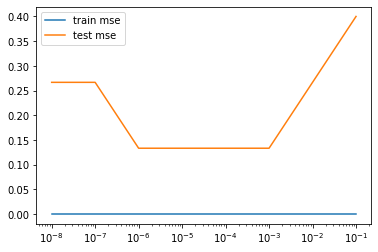

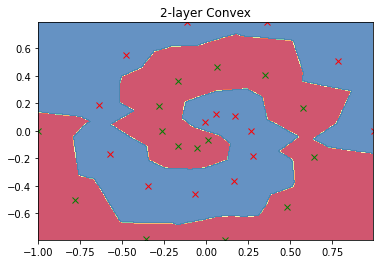

In [8]:
# generate a test data

betas = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4,1e-3, 1e-2, 1e-1]
train_mses = []
test_mses = []
Xtest=X+0.1*np.random.randn(X.shape[0],X.shape[1])
ytest=y

for beta in betas:
    U, Up = solve_problem(beta)

    ytest_est = np.sign(np.sum((Xtest@U>=0)*(Xtest@U)-(Xtest@Up>=0)*(Xtest@Up),axis=1))
    ytrainest = np.sign(np.sum((X@U>=0)*(X@U)-(X@Up>=0)*(X@Up),axis=1))
    train_mse = np.linalg.norm(y-ytrainest)**2/X.shape[0]
    test_mse = np.linalg.norm(ytest-ytest_est)**2/Xtest.shape[0]
    train_mses.append(train_mse)
    test_mses.append(test_mse)
    print(beta, "Test accuracy: ", np.sum(ytest==ytest_est)/Xtest.shape[0])
    print("Test error: ", test_mse)

    print("Train accuracy: ", np.sum(y==ytrainest)/X.shape[0])
    print("Train error: ", train_mse)
plt.plot(betas, train_mses, label="train mse")
plt.plot(betas, test_mses,label ="test mse" )

plt.semilogx()
plt.legend()
beta = betas[np.argmin(np.array(test_mses))]
U, Up = solve_problem(beta)
# template to visualize decision boundary
h = 0.005
x_min, x_max = X[:, 0].min() , X[:, 0].max() 
y_min, y_max = X[:, 1].min() , X[:, 1].max() 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
Xmesh=np.concatenate((Xmesh,np.ones((Xmesh.shape[0],1))),axis=1)


scores = np.sum((Xmesh@U>=0)*(Xmesh@U)-(Xmesh@Up>=0)*(Xmesh@Up),axis=1)
Z = np.array([s > 0 for s in scores])
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
#plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-layer Convex")
plt.plot(X[pos,0],X[pos,1],'rx');
plt.plot(X[neg,0],X[neg,1],'gx');


100%|██████████| 50000/50000 [00:19<00:00, 2587.89it/s]


[]

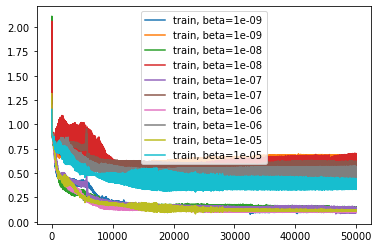

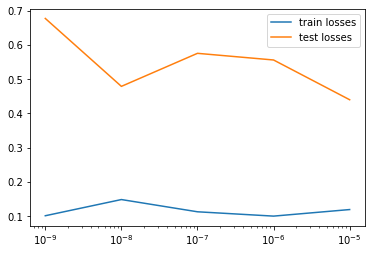

In [9]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

class FC1(nn.Module):

    def __init__(self,  input_dim, output_dim):
        super(FC1, self).__init__()
        hidden = 58
        self.fc1 = nn.Linear(input_dim, hidden)  
        self.fc2 = nn.Linear(hidden, 1)  

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.view(-1)
        return x
def train(beta):
    net = FC1(input_dim=3, output_dim=1)
    optimizer = optim.SGD(net.parameters(), lr=0.1, weight_decay=beta)
    criterion = nn.MSELoss()
    losses = []
        
    inputs, labels = X, y

    inputs, labels = torch.tensor(inputs), torch.tensor(labels)
    inputs_test = torch.tensor(Xtest)
    inputs_test = inputs_test.float()
    inputs = inputs.float()
    labels = labels.float()
    epochs = 50000
    losses_test = []
    for epoch in tqdm(range(epochs)):
        

        # zero the parameter gradients
        optimizer.zero_grad(set_to_none=True)

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        #print(f'[{epoch + 1}, {i + 1:5d}] loss: {loss.item():.3f}')
        losses.append(loss.item())
        outputs_test = net(inputs_test)
        loss2 = criterion(outputs_test, labels)
        losses_test.append(loss2.item())
        #print(loss.item(), loss2.item())
    return losses[-1], losses_test[-1], net, losses, losses_test
train_losses = []
test_losses = []
betas = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]

for beta in betas:
    train_mse, test_mse, _ , losses, losses_test = train(beta)
    plt.plot(losses, label="train, beta="+str(beta))
    plt.plot(losses_test, label="train, beta="+str(beta))

    train_losses.append(train_mse)
    test_losses.append(test_mse)
plt.legend()

plt.figure()
plt.plot(betas, train_losses, label="train losses")
plt.plot(betas, test_losses, label="test losses")
plt.legend()
plt.semilogx()


100%|██████████| 50000/50000 [00:17<00:00, 2785.67it/s]


[-3.7386425 -3.696146  -3.6536534 ...  4.2126884  4.2357426  4.2587976]


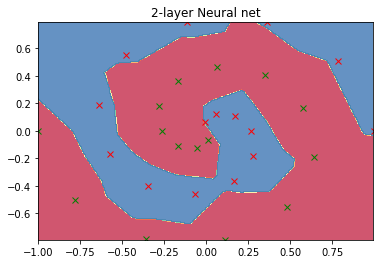

In [10]:
h = 0.005
x_min, x_max = X[:, 0].min() , X[:, 0].max() 
y_min, y_max = X[:, 1].min() , X[:, 1].max() 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
Xmesh=np.concatenate((Xmesh,np.ones((Xmesh.shape[0],1))),axis=1)

Xmesh = torch.tensor(Xmesh).float()
_, _ , net, _, _ = train(beta=1e-6)
scores = net(Xmesh).detach().numpy()
print(scores)
#scores = scores.detach().numpy()
Z = np.array([s > 0 for s in scores])
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
#plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-layer Neural net")
plt.plot(X[pos,0],X[pos,1],'rx');
plt.plot(X[neg,0],X[neg,1],'gx');